In [9]:
from PIL import Image
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
folder = "dataset"

In [33]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [34]:
tf.config.list_physical_devices('GPU')


[]

In [36]:
data = tf.keras.utils.image_dataset_from_directory('final',batch_size=8)
data.shuffle(buffer_size=7)

Found 703 files belonging to 2 classes.


<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
data_iterator = data.as_numpy_iterator()

In [39]:
batch=data_iterator.next()

In [40]:
batch[0].shape

(8, 256, 256, 3)

In [41]:
batch[1]

array([1, 0, 0, 0, 0, 1, 0, 1])

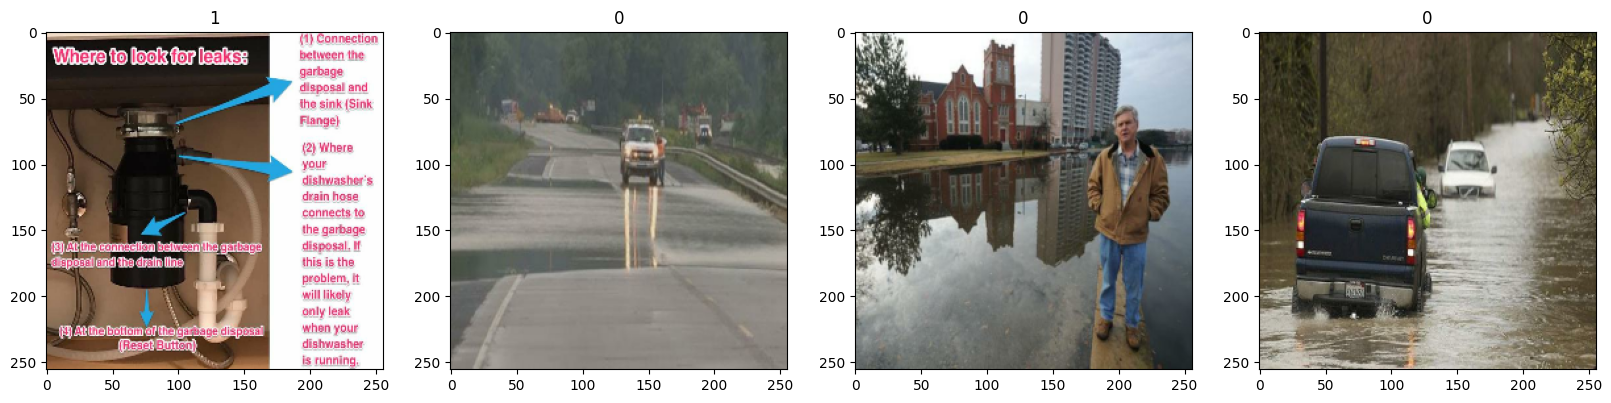

In [42]:
fig , ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [43]:
data = data.map(lambda x,y : (x/255,y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = scaled_iterator.next()

In [46]:
batch[0].max()

1.0

In [47]:
batch[0].min()

0.0

In [48]:
data.shuffle(buffer_size=1)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [51]:
len(test)

8

In [52]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [55]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [57]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
61/61 [==============================] - 14s 210ms/step - loss: 0.5907 - accuracy: 0.7193 - val_loss: 0.3803 - val_accuracy: 0.8309
Epoch 2/20
61/61 [==============================] - 14s 223ms/step - loss: 0.3425 - accuracy: 0.8648 - val_loss: 0.3703 - val_accuracy: 0.8603
Epoch 3/20
61/61 [==============================] - 14s 220ms/step - loss: 0.2218 - accuracy: 0.9119 - val_loss: 0.3209 - val_accuracy: 0.8162
Epoch 4/20
61/61 [==============================] - 14s 229ms/step - loss: 0.2595 - accuracy: 0.9078 - val_loss: 0.2671 - val_accuracy: 0.9044
Epoch 5/20
61/61 [==============================] - 14s 220ms/step - loss: 0.1508 - accuracy: 0.9447 - val_loss: 0.2543 - val_accuracy: 0.9044
Epoch 6/20
61/61 [==============================] - 14s 223ms/step - loss: 0.1251 - accuracy: 0.9529 - val_loss: 0.3550 - val_accuracy: 0.8750
Epoch 7/20
61/61 [==============================] - 13s 212ms/step - loss: 0.1020 - accuracy: 0.9611 - val_loss: 0.2845 - val_accuracy: 0.9118

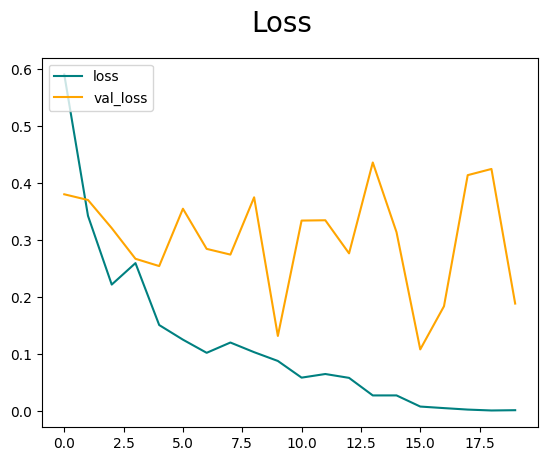

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label='loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [61]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 67ms/step


In [62]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:0.9411764740943909, Recall:0.8888888955116272, Accuracy:0.953125


#Test

In [63]:
import cv2

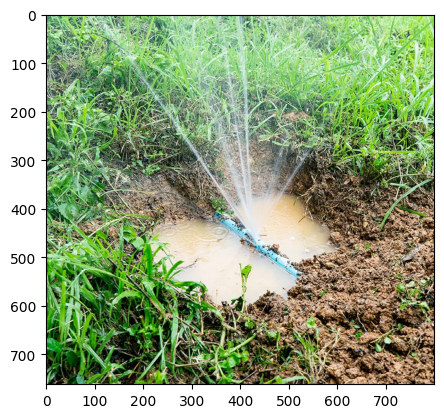

In [71]:
img = cv2.imread('final/waterleak/water pipe leak_262.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

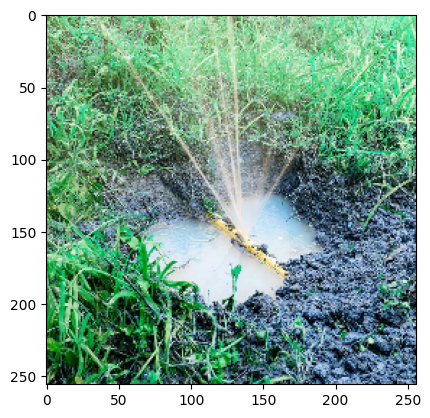

In [72]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 41ms/step


In [74]:
yhat

array([[1.]], dtype=float32)

In [75]:
if(yhat > 0.5):
    print("it is a water leak")

else:
    print("flooding")


it is a water leak


In [70]:
model.save("flooding_leak_model.h5")